# Applied Machine Learning Project 1 : Classification using Logistic Regression Models
**Srinath Murali Krishnan | NetID:SMK220008**

# Data Importing and Preliminary Analysis

1) We first import the data and identify the target variable
2) We describe the data and observe column values

In [450]:
import pandas as pd
import numpy as np

In [452]:
# Import Dataset
X_train = pd.read_csv('SBA_loans_project_1.csv')

In [453]:
X_train.drop('index',axis=1,inplace=True)

In [454]:
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input X_trainFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:200].to_dict())
                
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'X_traintype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [455]:
x=describe_more(X_train)

In [456]:
x

,A_Variable,Levels,X_traintype,Min Length,Max Length,Level_Values
0,City,31090,object,1,30,"{'LOS ANGELES': 10265, 'HOUSTON': 9166, 'NEW Y..."
1,State,51,object,2,3,"{'CA': 116234, 'TX': 62648, 'NY': 51520, 'FL':..."
2,Zip,32655,int64,1,5,"{10001: 843, 90015: 816, 93401: 702, 90010: 64..."
3,Bank,5690,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 77280, 'WELLS F..."
4,BankState,55,object,2,3,"{'CA': 105036, 'NC': 70727, 'IL': 58662, 'OH':..."
5,NAICS,1306,int64,1,6,"{0: 179808, 722110: 24960, 722211: 17305, 8111..."
6,NoEmp,579,int64,1,4,"{1: 137210, 2: 123131, 3: 80793, 4: 65687, 5: ..."
7,NewExist,3,float64,3,3,"{1.0: 573786, 2.0: 225426, 0.0: 922}"
8,CreateJob,230,int64,1,4,"{0: 560211, 1: 56249, 2: 51419, 3: 25670, 4: 1..."
9,RetainedJob,346,int64,1,4,"{0: 392105, 1: 78963, 2: 68443, 3: 44463, 4: 3..."


# Data Cleaning Step:

1) The strategy of data cleaning is to identify extra characters in columns that may or may not have just 2 viables characters such as RevLineCr and LowDoc with 'Y' and 'N'
2) we identify the context of the extra characters and replace them with Y and N respectively
3) if the character has no contextual backing, we convert them to null values
4) Final step involves identifying columns with null values and replacing them with imputed values in the corresponding column

In [459]:
#replacing values in RevLineCr with Y and N
X_train['RevLineCr']=X_train['RevLineCr'].replace('0','N')
X_train['RevLineCr']=X_train['RevLineCr'].replace('1','Y')
X_train['RevLineCr']=X_train['RevLineCr'].replace('T','Y')

In [461]:
#replacing values in RevLineCr with null that have no context
X_train['RevLineCr'] = X_train['RevLineCr'].apply(lambda x: x if x in ['Y', 'N'] else np.nan)


X_train['RevLineCr'].fillna(X_train['RevLineCr'].mode()[0], inplace=True)

In [464]:
#replacing values in LowDoc with Y and N
X_train['LowDoc']=X_train['LowDoc'].replace('0','N')
X_train['LowDoc']=X_train['LowDoc'].replace('S','Y')
X_train['LowDoc']=X_train['LowDoc'].replace('A','N')

In [465]:
#replacing values in LowDoc with null that have no context
X_train['LowDoc'] = X_train['LowDoc'].apply(lambda x: x if x in ['Y', 'N'] else np.nan)


X_train['LowDoc'].fillna(X_train['LowDoc'].mode()[0], inplace=True)


In [466]:
# defining target variable
y_train = X_train['MIS_Status']

In [467]:
y_train=y_train.to_frame()

In [468]:
X_train.drop('MIS_Status',axis=1,inplace=True)

In [469]:
describe_more(X_train)

,A_Variable,Levels,X_traintype,Min Length,Max Length,Level_Values
0,City,31090,object,1,30,"{'LOS ANGELES': 10265, 'HOUSTON': 9166, 'NEW Y..."
1,State,51,object,2,3,"{'CA': 116234, 'TX': 62648, 'NY': 51520, 'FL':..."
2,Zip,32655,int64,1,5,"{10001: 843, 90015: 816, 93401: 702, 90010: 64..."
3,Bank,5690,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 77280, 'WELLS F..."
4,BankState,55,object,2,3,"{'CA': 105036, 'NC': 70727, 'IL': 58662, 'OH':..."
5,NAICS,1306,int64,1,6,"{0: 179808, 722110: 24960, 722211: 17305, 8111..."
6,NoEmp,579,int64,1,4,"{1: 137210, 2: 123131, 3: 80793, 4: 65687, 5: ..."
7,NewExist,3,float64,3,3,"{1.0: 573786, 2.0: 225426, 0.0: 922}"
8,CreateJob,230,int64,1,4,"{0: 560211, 1: 56249, 2: 51419, 3: 25670, 4: 1..."
9,RetainedJob,346,int64,1,4,"{0: 392105, 1: 78963, 2: 68443, 3: 44463, 4: 3..."


In [470]:
#imputing null values
cat=['City','State','Bank','BankState']
num=['NewExist']
for i in cat:
    X_train[i].fillna(X_train[i].mode().iloc[0],inplace=True)
for i in num:
    X_train[i].fillna(X_train[i].median(),inplace=True)

In [471]:
# check if any columns still have null values
cat=[]
for col in X_train.columns:
    if X_train[col].isna().any() == True:
        print(col)

# Feature Engineering step

1) We construct 10 new features from the existing features in the dataset
2) The task is to create better features packed with more contextual information
3) We further use VIF for feature selection and getting rid of any possible multicollinearity

In [474]:
"""X=X_train.copy()
geo_concentration = data['State'].value_counts(normalize=True)
data['geo_concentration'] = data['State'].map(geo_concentration)"""

"X=X_train.copy()\ngeo_concentration = data['State'].value_counts(normalize=True)\ndata['geo_concentration'] = data['State'].map(geo_concentration)"

In [475]:
# Assuming 'X_train' is your X_trainFrame and already includes basic preprocessing

# Feature 1: Loan Size Category
X_train['LoanSizeCategory'] = pd.cut(X_train['GrAppv'], bins=[0, 50000, 150000, 350000, 1000000, 5000000], labels=['Micro', 'Small', 'Medium', 'Large', 'Very Large'])

# Feature 2: Job Creation Category
X_train['JobCreationCategory'] = pd.cut(X_train['CreateJob'] + X_train['RetainedJob'], bins=[-1, 0, 5, 10, 20, 50, 100, float('inf')], labels=['None', 'Few', 'Some', 'Moderate', 'Many', 'A Lot', 'Massive'])

# Feature 3: High-Risk Industry (NAICxS codes starting with 72 are typically hospitality, considered higher risk)
X_train['HighRiskIndustry'] = X_train['NAICS'].apply(lambda x: 1 if str(x).startswith('72') else 0)

# Feature 4: Loan/Grant Ratio
X_train['LoanGrantRatio'] = X_train['GrAppv'] / X_train['SBA_Appv']

# Feature 5: Per Employee Investment
X_train['PerEmployeeInvestment'] = X_train['GrAppv'] / (X_train['NoEmp'] + 1)  # Avoid division by zero



In [476]:

# Feature 6: Business Age - New business flag (assuming NewExist codes: 1 for existing, 2 for new)
X_train['NewBusiness'] = X_train['NewExist'].apply(lambda x: 1 if x == 2 else 0)

# Feature 7: Urban Business - Flag for businesses in urban areas (assuming UrbanRural codes: 1 for urban, 2 for rural, 0 for undefined)
X_train['UrbanBusiness'] = X_train['UrbanRural'].apply(lambda x: 1 if x == 1 else 0)

# Feature 8: Franchise Flag - Flag for whether the business is a franchise (assuming FranchiseCode: 1 or 0 indicates not a franchise, any other value indicates a franchise)
X_train['FranchiseFlag'] = X_train['FranchiseCode'].apply(lambda x: 0 if x == 1 or x == 0 else 1)

# Feature 9: Expansion Plan - Flag businesses creating more jobs than retaining (CreateJob > RetainedJob)
X_train['ExpansionPlan'] = X_train.apply(lambda x: 1 if x['CreateJob'] > x['RetainedJob'] else 0, axis=1)

# Feature 10: Economic Sector - Extract broader economic sector from NAICS code (first two digits of NAICS code)
X_train['EconomicSector'] = X_train['NAICS'].apply(lambda x: int(str(x)[:2]) if x > 0 else 0)

In [477]:
X_train

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,...,LoanSizeCategory,JobCreationCategory,HighRiskIndustry,LoanGrantRatio,PerEmployeeInvestment,NewBusiness,UrbanBusiness,FranchiseFlag,ExpansionPlan,EconomicSector
0,APPLETON,WI,59414,ASSOCIATED BANK NATL ASSOC,WI,321918,26,1.0,0,0,...,Small,None,0,1.250000,3703.703704,0,0,0,0,32
1,WEATHERFORD,TX,76086,REGIONS BANK,AL,621391,2,1.0,1,3,...,Small,Few,0,1.176471,48733.333333,0,1,0,0,62
2,FLORENCE,SC,29505,"SUPERIOR FINANCIAL GROUP, LLC",CA,236220,3,1.0,3,3,...,Micro,Some,0,1.176471,5000.000000,0,1,0,0,23
3,BOSTON,MA,2124,CITIZENS BANK NATL ASSOC,RI,236115,5,1.0,0,5,...,Small,Few,0,2.000000,12500.000000,0,1,0,0,23
4,LAFAYETTE,IN,47904,THE HUNTINGTON NATIONAL BANK,OH,0,82,1.0,0,0,...,Small,None,0,1.250000,963.855422,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,FAIRFIELD,OH,45014,ACCESS BUS. DEVEL & FINANCE IN,OH,235920,3,1.0,5,0,...,Small,Few,0,1.000000,36250.000000,0,0,0,1,23
800251,COHOES,NY,12047,EMPIRE ST. CERT. DEVEL CORP,NY,541430,10,1.0,0,1,...,Medium,Few,0,1.000000,18000.000000,0,1,0,0,54
800252,MANSFIELD,MA,2048,BANK OF AMERICA NATL ASSOC,RI,722320,3,1.0,0,3,...,Micro,Few,1,2.000000,2500.000000,0,1,0,0,72
800253,WALLINGTON,NJ,7057,VALLEY NATIONAL BANK,NJ,447110,3,1.0,3,3,...,Large,Some,0,1.333333,130000.000000,0,1,0,0,44


In [478]:
# convert columns fo category type to object 
for col in X_train.select_dtypes(include=['category']).columns:
    X_train[col] = X_train[col].astype('object')

In [479]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [480]:
# compute the vif for all given features
def compute_vif(considered_features):
    
    X = X_train[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [481]:
compute_vif(numeric)

/var/folders/x3/5n0yyb7911zg532jx71xlkrr0000gn/T/ipykernel_89675/3288876314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,Zip,1.027956
1,NAICS,14568.940812
2,NoEmp,1.024878
3,NewExist,177.651526
4,CreateJob,95.305460
5,RetainedJob,95.298903
6,FranchiseCode,4.220769
7,UrbanRural,1.517659
8,DisbursementGross,18.197366
9,BalanceGross,1.000068


In [482]:
drops=['NewExist','CreateJob','RetainedJob','NAICS','GrAppv','SBA_Appv']

In [483]:
res = [item for item in numeric if item not in drops]
compute_vif(res)

/var/folders/x3/5n0yyb7911zg532jx71xlkrr0000gn/T/ipykernel_89675/3288876314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,Zip,1.027287
1,NoEmp,1.020546
2,FranchiseCode,4.220009
3,UrbanRural,1.426755
4,DisbursementGross,1.484929
5,BalanceGross,1.000066
6,HighRiskIndustry,1.210052
7,LoanGrantRatio,1.445532
8,PerEmployeeInvestment,1.451915
9,NewBusiness,1.078733


# Data Encoding Step

1) This step involves identifying the numerical and categorical columns: a) for one hot and b) woe encoding
2) The categorical columns undergo encoding based on whether they have less than 10 values or not
3) further we scale the numerical columns
4) we save the encoders/scalers

In [486]:
import category_encoders as ce

# Assuming 'X_train' is the X_trainFrame after feature engineering
# Assuming 'target' is the name of the target column in 'X_train'

# Identify categorical variables with less than 10 unique values for one-hot encoding
cat_vars_for_one_hot = [col for col in X_train.columns if (X_train[col].nunique() < 10) and (X_train[col].dtype == 'object')]

# Now, for target and WOE encoding, identify the remaining categorical variables
remaining_cat_vars = [col for col in X_train.columns if (X_train[col].dtype == 'object') and (col not in cat_vars_for_one_hot)]

numeric=[col for col in X_train.columns if (X_train[col].dtype != 'object') ]


In [487]:
cat_vars_for_one_hot

['RevLineCr', 'LowDoc', 'LoanSizeCategory', 'JobCreationCategory']

In [488]:
remaining_cat_vars

['City', 'State', 'Bank', 'BankState']

In [489]:
numeric

['Zip',
 'NAICS',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv',
 'HighRiskIndustry',
 'LoanGrantRatio',
 'PerEmployeeInvestment',
 'NewBusiness',
 'UrbanBusiness',
 'FranchiseFlag',
 'ExpansionPlan',
 'EconomicSector']

In [490]:
from sklearn.model_selection import train_test_split
 
# using the train test split function
x_train, x_val, y_t, y_val = train_test_split(
  X_train,y_train , random_state=104,test_size=0.1, shuffle=True)

In [491]:
# Initialize WOE encoder for categorical variables
woe_encoder = ce.WOEEncoder(cols=remaining_cat_vars)

# Fit the WOE encoder on the training data
# Assuming 'target' is the name of your target variable in the training data
woe_encoder.fit(x_train[remaining_cat_vars], y_t)

# Transform the training and validation data using the fitted encoder
x_train = x_train.join(woe_encoder.transform(x_train[remaining_cat_vars]).add_suffix('_woe'))
x_val = x_val.join(woe_encoder.transform(x_val[remaining_cat_vars]).add_suffix('_woe'))


In [492]:
from sklearn.preprocessing import StandardScaler

In [493]:
# using Standard Scaler to Scale the numerical columns
scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(x_train[res])
# Transform the training and validation data using the fitted scaler
x_train[res] = scaler.transform(x_train[res])
x_val[res] = scaler.transform(x_val[res])

In [494]:
import pickle

# Assuming woe_encoder is your fitted encoder
with open('woe_encoder.pkl', 'wb') as file:
    pickle.dump(woe_encoder, file)

In [495]:
# Assuming scaler is your fitted scaler
with open('standardscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [496]:
# drop the unencoded columns
x_train.drop(columns=remaining_cat_vars,axis=1,inplace=True)
x_train.drop(columns=drops,axis=1,inplace=True)

In [497]:
#steps repeated for validation
x_val.drop(columns=remaining_cat_vars,axis=1,inplace=True)
x_val.drop(columns=drops,axis=1,inplace=True)

In [498]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Initialize the OneHotEncoder
ohe_encoder = OneHotEncoder(sparse=False, drop='first')  # `drop='first'` to drop the first category to avoid multicollinearity
# LoanSizeCategory: Column Dropped is LoanSizeCategoryLarge
# JobCreationCategory: Column Dropped is JobCreationCategoryFew
# RevLineCr: Column Dropped is RevLineCrN
# LowDoc: Column Dropped is LowDocN

# Fit the encoder on the training data
ohe_encoder.fit(x_train[cat_vars_for_one_hot])


OneHotEncoder(drop='first', sparse=False)

In [499]:
x_train_ohe = ohe_encoder.transform(x_train[cat_vars_for_one_hot])
# Convert to DataFrame and name columns
columns = ohe_encoder.get_feature_names_out(cat_vars_for_one_hot)
x_train_ohe = pd.DataFrame(x_train_ohe, columns=columns, index=x_train.index)

# Repeat for validation/test data
x_val_ohe = ohe_encoder.transform(x_val[cat_vars_for_one_hot])
x_val_ohe = pd.DataFrame(x_val_ohe, columns=columns, index=x_val.index)


In [500]:
# add onehot encoded columns to x_train and x_val
x_train = pd.concat([x_train.drop(columns=cat_vars_for_one_hot), x_train_ohe], axis=1)

In [501]:
x_val = pd.concat([x_val.drop(columns=cat_vars_for_one_hot), x_val_ohe], axis=1)

In [502]:
x_train

,Zip,NoEmp,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,HighRiskIndustry,LoanGrantRatio,PerEmployeeInvestment,NewBusiness,...,LoanSizeCategory_Micro,LoanSizeCategory_Small,LoanSizeCategory_Very Large,LoanSizeCategory_nan,JobCreationCategory_Few,JobCreationCategory_Many,JobCreationCategory_Massive,JobCreationCategory_Moderate,JobCreationCategory_None,JobCreationCategory_Some
78577,-0.023060,-0.112077,-0.215919,0.374522,-0.526646,-0.00225,-0.285072,1.220495,-0.289298,-0.626342,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
688865,0.051855,0.061364,-0.215919,0.374522,-0.051883,-0.00225,-0.285072,-0.425127,-0.314544,-0.626342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
753608,-1.353901,-0.072052,-0.215997,0.374522,-0.474282,-0.00225,-0.285072,1.220495,-0.341356,-0.626342,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
538325,-0.429371,-0.138760,-0.215919,-1.172169,-0.552828,-0.00225,-0.285072,-0.630830,-0.147586,1.596573,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
577652,0.827549,0.221462,-0.215919,-1.172169,1.567897,-0.00225,-0.285072,-0.425127,-0.128738,-0.626342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578687,0.989720,-0.138760,-0.215919,0.374522,-0.419126,-0.00225,-0.285072,-0.812332,0.162560,1.596573,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
170150,0.352317,-0.138760,-0.215919,1.921212,-0.380028,-0.00225,-0.285072,-0.812332,0.253255,-0.626342,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
516750,-1.626057,-0.018686,-0.215919,0.374522,-0.195010,-0.00225,-0.285072,1.220495,-0.278256,-0.626342,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
115417,0.137605,-0.072052,-0.215919,0.374522,-0.376537,-0.00225,-0.285072,-0.812332,-0.276573,-0.626342,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [503]:
import pickle

# Assuming onehot_encoder is your fitted encoder
with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(ohe_encoder, file)

In [504]:
x_train

,Zip,NoEmp,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,HighRiskIndustry,LoanGrantRatio,PerEmployeeInvestment,NewBusiness,...,LoanSizeCategory_Micro,LoanSizeCategory_Small,LoanSizeCategory_Very Large,LoanSizeCategory_nan,JobCreationCategory_Few,JobCreationCategory_Many,JobCreationCategory_Massive,JobCreationCategory_Moderate,JobCreationCategory_None,JobCreationCategory_Some
78577,-0.023060,-0.112077,-0.215919,0.374522,-0.526646,-0.00225,-0.285072,1.220495,-0.289298,-0.626342,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
688865,0.051855,0.061364,-0.215919,0.374522,-0.051883,-0.00225,-0.285072,-0.425127,-0.314544,-0.626342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
753608,-1.353901,-0.072052,-0.215997,0.374522,-0.474282,-0.00225,-0.285072,1.220495,-0.341356,-0.626342,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
538325,-0.429371,-0.138760,-0.215919,-1.172169,-0.552828,-0.00225,-0.285072,-0.630830,-0.147586,1.596573,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
577652,0.827549,0.221462,-0.215919,-1.172169,1.567897,-0.00225,-0.285072,-0.425127,-0.128738,-0.626342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578687,0.989720,-0.138760,-0.215919,0.374522,-0.419126,-0.00225,-0.285072,-0.812332,0.162560,1.596573,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
170150,0.352317,-0.138760,-0.215919,1.921212,-0.380028,-0.00225,-0.285072,-0.812332,0.253255,-0.626342,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
516750,-1.626057,-0.018686,-0.215919,0.374522,-0.195010,-0.00225,-0.285072,1.220495,-0.278256,-0.626342,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
115417,0.137605,-0.072052,-0.215919,0.374522,-0.376537,-0.00225,-0.285072,-0.812332,-0.276573,-0.626342,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [507]:
y_t

,MIS_Status
78577,0
688865,1
753608,1
538325,0
577652,0
...,...
578687,0
170150,0
516750,0
115417,0


# Model Training Step

1) We run a dry model with random hyperparameters 
2) We compute the classification report for the corresponding model 
3) We analyze the metrics and identify where the tuning must be done

In [445]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt


In [554]:
# First logreg model
lr = LogisticRegression(C=0.01,penalty='l1', solver='saga', random_state=42, max_iter=500)
lr.fit(x_train, y_t)
y_pred = lr.predict(x_val)
print(classification_report(y_val, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.98      0.91     66046
           1       0.58      0.15      0.24     13980

    accuracy                           0.83     80026
   macro avg       0.71      0.56      0.57     80026
weighted avg       0.80      0.83      0.79     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


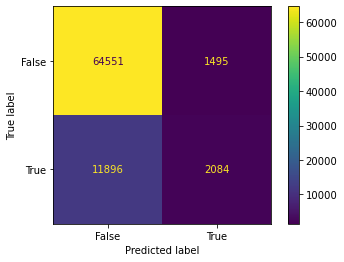

In [555]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_pred), display_labels = [False, True])
cm_display.plot()

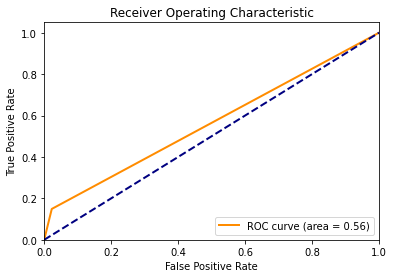

In [556]:
# Calculating ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model Tuning Step

1) We first define the searchspace for our logrep model tuning
2) We experiment with different regularizations and Max iterations
3) After running GridSearch, we use different class weights to compare results
4) We pick the best hyerparameters based on our tuning process

In [523]:
# We use GridSearch for hyperparameter tuning
# we first define the searchspace for hyperparameters
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.01,0.001,0.1,1],
    'solver' : ['saga'],
    'max_iter' : [100,300,500,700,1000]
    }
]
# run the algorithm
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1,scoring='roc_auc')
best_clf = clf.fit(x_train,y_t)


Fitting 2 folds for each of 80 candidates, totalling 160 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector

In [524]:
best_clf.best_estimator_

LogisticRegression(C=0.01, max_iter=1000, solver='saga')

In [89]:
# run the model with best parameters in gridsearch
final_model=LogisticRegression(C= 0.01, penalty= 'none', solver= 'saga', max_iter=1000)
final_model.fit(x_train, y_t)
y_pred = final_model.predict(x_val)
print(classification_report(y_pred,y_val))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.84      0.91     76418
           1       0.15      0.58      0.24      3608

    accuracy                           0.83     80026
   macro avg       0.56      0.71      0.57     80026
weighted avg       0.94      0.83      0.88     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [90]:
# now we try different classweights to find the best model for our project
weights = [{0: 1, 1: w} for w in [1, 2,2.05,2.1,2.3,2.35,2.7,2.9,3,4,5]]
for weight in weights:
    lr = LogisticRegression(C=0.01,penalty='none', solver='saga', random_state=42, max_iter=1000,class_weight=weight)
    lr.fit(x_train, y_t)
    y_pred = lr.predict(x_val)
    print(f"Class weights: {weight}")
    print(classification_report(y_val, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Class weights: {0: 1, 1: 1}
              precision    recall  f1-score   support

           0       0.84      0.98      0.91     66046
           1       0.58      0.15      0.24     13980

    accuracy                           0.83     80026
   macro avg       0.71      0.56      0.57     80026
weighted avg       0.80      0.83      0.79     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 2}
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     66046
           1       0.44      0.38      0.41     13980

    accuracy                           0.81     80026
   macro avg       0.66      0.64      0.65     80026
weighted avg       0.80      0.81      0.80     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 2.05}
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     66046
           1       0.44      0.39      0.41     13980

    accuracy                           0.81     80026
   macro avg       0.66      0.64      0.65     80026
weighted avg       0.80      0.81      0.80     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 2.1}
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     66046
           1       0.43      0.40      0.42     13980

    accuracy                           0.80     80026
   macro avg       0.65      0.64      0.65     80026
weighted avg       0.80      0.80      0.80     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Class weights: {0: 1, 1: 2.3}
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     66046
           1       0.42      0.43      0.43     13980

    accuracy                           0.80     80026
   macro avg       0.65      0.65      0.65     80026
weighted avg       0.80      0.80      0.80     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Class weights: {0: 1, 1: 2.35}
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     66046
           1       0.41      0.44      0.43     13980

    accuracy                           0.79     80026
   macro avg       0.65      0.66      0.65     80026
weighted avg       0.80      0.79      0.80     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Class weights: {0: 1, 1: 2.7}
              precision    recall  f1-score   support

           0       0.89      0.84      0.86     66046
           1       0.39      0.50      0.44     13980

    accuracy                           0.78     80026
   macro avg       0.64      0.67      0.65     80026
weighted avg       0.80      0.78      0.79     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Class weights: {0: 1, 1: 2.9}
              precision    recall  f1-score   support

           0       0.89      0.82      0.85     66046
           1       0.38      0.52      0.44     13980

    accuracy                           0.77     80026
   macro avg       0.64      0.67      0.65     80026
weighted avg       0.80      0.77      0.78     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Class weights: {0: 1, 1: 3}
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     66046
           1       0.38      0.54      0.44     13980

    accuracy                           0.76     80026
   macro avg       0.63      0.67      0.65     80026
weighted avg       0.80      0.76      0.78     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 4}
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     66046
           1       0.34      0.64      0.44     13980

    accuracy                           0.72     80026
   macro avg       0.62      0.69      0.63     80026
weighted avg       0.81      0.72      0.75     80026

Class weights: {0: 1, 1: 5}
              precision    recall  f1-score   support

           0       0.92      0.66      0.77     66046
           1       0.31      0.72      0.43     13980

    accuracy                           0.67     80026
   macro avg       0.61      0.69      0.60     80026
weighted avg       0.81      0.67      0.71     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Best Model 

1) We have identified the best model so we simply train the model
2) We find the ideal threshold for our model
3) We compute the metrics and export the model for scoring function

In [557]:
#Fit the model with best hyperparameters
bestlr = LogisticRegression(penalty='none', solver='saga', random_state=42, max_iter=1000,class_weight={0:1,1:3})
bestlr.fit(x_train, y_t)
y_pred = bestlr.predict(x_val)
print(classification_report(y_val, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.81      0.85     66046
           1       0.38      0.54      0.44     13980

    accuracy                           0.76     80026
   macro avg       0.63      0.67      0.65     80026
weighted avg       0.80      0.76      0.78     80026



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


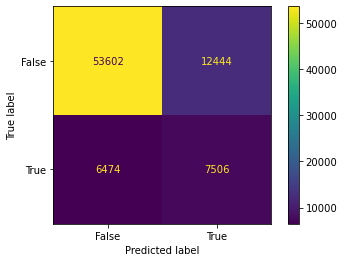

In [558]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_pred), display_labels = [False, True])
cm_display.plot()

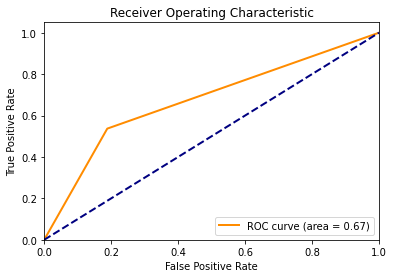

In [559]:
# Calculating ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [560]:
y_probs = bestlr.predict_proba(x_val)[:, 1]

# Find optimal threshold using F1 macro score
thresholds = np.arange(0, 1, 0.01)
f1_scores = [f1_score(y_val, (y_probs > threshold).astype(int), average='macro') for threshold in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]

print("Optimal Threshold using F1 Macro Score:", optimal_threshold)

Optimal Threshold using F1 Macro Score: 0.54


In [561]:
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(bestlr, file)

**Strategy for scoring:
    Load artifacts one by one on this file and experiment on the validation file by loading it here first
    Perform the trasformations and then the testing on the file and get the output the same way its done on the function
    if it works , export the code from here to the scoring function.**
    

**So the scoring function has been done. 
But there are some issues to address:
    1) Data might be severely imbalanced since F1 score is low
    2) Threshold is 0 which is bad again due to imbalance 
    3) Might have to drop original features in favor of engineered features or,
    4) Feature Selection algorithms**

# H20 glm

1) Similar to sklearn we train a glm in h20 framework
2) We repeat the same steps but we dont have to repeat the encoding steps since it has already been done

In [562]:
import h2o
try:
    h2o.cluster().shutdown()
except:
    pass 

In [563]:
# Adjust as per limits on your PC
# Limit to 8 threads and 8GB memory
h2o.init(nthreads=8, max_mem_size=8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 day 15 hours 39 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 28 days
H2O_cluster_name:,H2O_from_python_srinathmurali_y7ymly
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.880 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [564]:
import pandas as pd

# Assuming x_train is your data and y_train is your target column
# Make sure y_train is a Series with the same index as x_train
combined_df = pd.concat([x_train, y_t], axis=1)
training_frame = h2o.H2OFrame(combined_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [565]:
# validation frame
combined_df_val = pd.concat([x_val, y_val], axis=1)
validation_frame = h2o.H2OFrame(combined_df_val)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# GLM Model Building

We train the glm model with default set of hyperparamters

In [568]:
from h2o.estimators import H2OGeneralizedLinearEstimator

# Specify the feature and target names
feature_cols = x_train.columns.tolist()
target_col = 'MIS_Status'

# Define and train the model
model = H2OGeneralizedLinearEstimator(family="binomial")  # Example for logistic regression
model.train(x=feature_cols, y=target_col, training_frame=training_frame)


glm Model Build progress: |

/opt/anaconda3/lib/python3.9/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1710821266515_115


GLM Model: summary
    family    link    regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 1.983E-4 )  31                            28                             4                       Key_Frame__upload_a192a381ec49060d178efde966634972.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.11992402103625602
RMSE: 0.34630047796134505
LogLoss: 0.38266771297091134
AUC: 0.7839540166667974
AUCPR: 0.4551022104752934
Gini: 0.5679080333335949
Null degrees of freedom: 720228
Residual degrees of freedom: 720200
Null deviance: 668474.1727504975
Residual deviance: 551216.768490653
AIC: 551274.768490653

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23909745269711485
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      475777  118252  0.1991   (118252.0/594029.0)
1      50746   75454   0.4021   (50746.0/126200.0)
Total  526523  193706  0.2346   (168998.0/720229.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.239097     0.471726  219
max f2                       0.13189      0.604124  292
max f0point5                 0.371144     0.464407  147
max accuracy                 0.513199     0.836644  89
max precision                0.960303     1         0
max recall                   0.00232468   1         398
max specificity              0.960303     1         0
max absolute_mcc             0.262247     0.34269   205
max min_per_class_accuracy   0.18685      0.709778  252
max mean_per_class_accuracy  0.175772     0.710627  260
max tns                      0.960303     594029    0
max fns                      0.960303     126181    0
max fps                      0.00129246   594029    399
max tps                      0.00232468   126200    398
max tnr                      0.960303     1         0
max fnr                      0.960303     0.999849  0
max fpr                      0.00129246   1         399
max tpr                      0.00232468   1         398

Gains/Lift Table: Avg response rate: 17.52 %, avg score: 17.52 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010001                    0.687847           4.40765   4.40765            0.772317         0.755735    0.772317                    0.755735            0.0440808       0.0440808                  340.765   340.765            0.04132
2        0.0200006                   0.620066           3.79334   4.10051            0.664676         0.652345    0.718501                    0.704044            0.0379319       0.0820127                  279.334   310.051            0.0751864
3        0.0300002                   0.567925           3.38445   3.86184            0.59303          0.593057    0.676679                    0.66705             0.0338431       0.115856                   238.445   286.184            0.104095
4        0.0400012                   0.526882           3.14153   3.68175            0.5

# Hyperparameter tuning

1) We use gridsearch to find ideal set of hyperparameters
2) We extract the best model directly from gridsearch

In [571]:
from h2o.grid.grid_search import H2OGridSearch

hyper_params = {
    'alpha': [0, 0.2, 0.4, 0.6, 0.8, 1],  # Regularization type mix
    'lambda': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5],  # Regularization strength
}

# Set up Grid Search
grid = H2OGridSearch(model=H2OGeneralizedLinearEstimator(family="binomial"),
                     hyper_params=hyper_params,
                     search_criteria={'strategy': "Cartesian"})

# Train the model
grid.train(x=feature_cols, y=target_col, training_frame=training_frame,validation_frame=validation_frame)


glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/opt/anaconda3/lib/python3.9/site-packages/h2o/grid/grid_search.py:429: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


,alpha,lambda,model_ids,logloss
,0.4,0.001,Grid_GLM_Key_Frame__upload_a192a381ec49060d178efde966634972.hex_model_python_1710821266515_117_model_15,0.3966759
,0.6,0.001,Grid_GLM_Key_Frame__upload_a192a381ec49060d178efde966634972.hex_model_python_1710821266515_117_model_16,0.3966837
,0.2,0.001,Grid_GLM_Key_Frame__upload_a192a381ec49060d178efde966634972.hex_model_python_1710821266515_117_model_14,0.3966879
,1.0,0.001,Grid_GLM_Key_Frame__upload_a192a381ec49060d178efde966634972.hex_model_python_1710821266515_117_model_18,0.3966898
,0.8,0.001,Grid_GLM_Key_Frame__upload_a192a381ec49060d178efde966634972.hex_model_python_1710821266515_117_model_17,0.3966904
,0.0,0.001,Grid_GLM_Key_Frame__upload_a192a381ec49060d178efde966634972.hex_model_python_1710821266515_117_model_13,0.3967103
,1.0,0.0001,Grid_GLM_Key_Frame__upload_a192a381ec49060d178efde966634972.hex_model_python_1710821266515_117_model_12,0.3968081
,0.8,0.0001,Grid_GLM_Key_Frame__upload_a192a381ec49060d178efde966634972.hex_model_python_1710821266515_117_model_11,0.3968123
,0.6,0.0001,Grid_GLM_Key_Frame__upload_a192a381ec49060d178efde966634972.hex_model_python_1710821266515_117_model_10,0.3968141
,0.4,0.0001,Grid_GLM_Key_Frame__upload_a192a381ec49060d178efde966634972.hex_model_python_1710821266515_117_model_9,0.3968164


In [572]:
# Get the grid search results
grid_results = grid.sorted_metric_table()
print(grid_results)


      alpha   lambda                                          model_ids  \
0       0.4  0.00100  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
1       0.6  0.00100  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
2       0.2  0.00100  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
3       1.0  0.00100  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
4       0.8  0.00100  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
5       0.0  0.00100  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
6       1.0  0.00010  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
7       0.8  0.00010  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
8       0.6  0.00010  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
9       0.4  0.00010  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
10      0.0  0.00010  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
11      0.2  0.00010  Grid_GLM_Key_Frame__upload_a192a381ec49060d178...   
12      0.0  0.00001  Gri

# Best model 

We extract the best model and identify the model metrics and performance

In [575]:
# print best model performance metrics
best_model = grid.get_grid(sort_by="auc", decreasing=True).models[0]
print("Best model performance: ", best_model.model_performance(training_frame))


Best model performance:  ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.11991867473761374
RMSE: 0.34629275871379944
LogLoss: 0.3826531738045614
AUC: 0.7839834488089299
AUCPR: 0.4551406224152404
Gini: 0.5679668976178598
Null degrees of freedom: 720228
Residual degrees of freedom: 720197
Null deviance: 668474.1727504975
Residual deviance: 551195.8254321709
AIC: 551259.8254321709

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23788064268767925
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      474334  119695  0.2015   (119695.0/594029.0)
1      50286   75914   0.3985   (50286.0/126200.0)
Total  524620  195609  0.236    (169981.0/720229.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.237881     0.471795  222
max f2                       0.129904     0.6040

# SUMMARY OF THE PROJECT

**The project primarily focued on the SBA loans dataset. After data cleaning and EDA we used feature engineering to create better features for our model. The project included the use of logistic regression in both sklearn and h20. The logistic regression models used were experimented with multiple hyperparamreters using gridsearch and the ideal set of parameters was identified. The feature engineering step helped decrease multicollinearity by using PCA and further using feature selection/ViF helped improve performance. From the observations made, the best model had no regularization and performed with an f1 macro score of 0.65 and accuracy of 76%. On further analysis using Scoring function and the kaggle submission board, a score of 76.45% was obtained. On the H20 side our best model performs with an AUC score of 0.78 and AIC of 551259.8254321709. we experimented with multiple regularizations and regularization strenghts. The sklearn model was used for our scoring function since it gave us the best results. The ideal threshold after using f1 macro was 0.54. 
Moving forward a set of recommendations would primarily focus on experimenting with other models that deal better with data imbalance. Another approach could be used data resampling such as oversampling and undersampling the data to try improving model performance. Lastly more engineered features which increase explainability could ultimately result in a better model.**